<a href="https://colab.research.google.com/github/FIONA-Youkyung/Machin_Learining_Class/blob/master/Convolution_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

im2col 함수를 사용한 Convolution Network 구현


In [8]:
import numpy as np
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving util.py to util (3).py
User uploaded file "util.py" with length 3025 bytes


In [101]:
uploaded1 = files.upload()

for fn in uploaded1.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded1[fn])))

Saving v.jpg to v (1).jpg
User uploaded file "v.jpg" with length 340236 bytes


In [0]:
from util import im2col
from PIL import Image

*   가상의 이미지가 있다고 가정할 수 있도록 x 데이터 생성
*  필터는 Stride = 1, padding = 0  으로 가정


In [27]:
if __name__ == '__main__' : 
  np.random.seed(115)
  x = np.random.randint(10,size =(1,3,7,7))
  print(x,',xshape:',x.shape)
  w = np.random.randint(5, size=(1, 3, 5, 5))
  print(w, ', wshape:', w.shape)

[[[[2 0 2 6 0 5 1]
   [9 1 3 7 1 4 9]
   [2 6 1 4 7 5 1]
   [4 0 5 3 2 0 1]
   [3 4 9 6 8 2 8]
   [6 9 8 8 8 1 1]
   [2 9 6 8 7 2 5]]

  [[3 9 1 4 7 1 6]
   [6 2 5 4 8 1 4]
   [7 1 3 7 8 6 6]
   [5 0 1 1 9 0 3]
   [5 2 7 2 8 9 2]
   [8 4 4 4 1 5 6]
   [3 5 8 8 5 9 1]]

  [[2 6 2 1 7 0 0]
   [6 6 7 3 4 2 9]
   [3 0 2 2 6 4 9]
   [7 4 9 7 5 0 5]
   [4 5 7 6 8 9 4]
   [7 9 3 0 5 1 3]
   [4 8 9 9 5 1 0]]]] ,xshape: (1, 3, 7, 7)
[[[[0 2 2 0 0]
   [1 2 0 4 2]
   [2 0 2 2 1]
   [2 4 1 2 2]
   [2 3 0 2 0]]

  [[1 0 4 0 1]
   [0 2 0 3 1]
   [2 2 3 1 0]
   [0 3 3 4 0]
   [3 3 4 3 1]]

  [[4 0 2 4 4]
   [4 1 1 2 0]
   [3 3 2 1 0]
   [1 1 3 1 1]
   [3 4 4 2 1]]]] , wshape: (1, 3, 5, 5)


밑바닥부터 시작하는 딥러닝 247page 그림 7-20 참고


In [45]:
# 이미지 데이터 X를 함수 im2col에 전달하여, 2차원 배열로 전환 
x_col = im2col(x,filter_h=5,filter_w=5,stride=1,pad=0)
print(x_col.shape)

# 4차원 배열인 필터 w를 2차원 배열로 변환 
w_col = w.reshape(1,-1)
print(w_col,w_col.shape)

# dot product 를 진행하기 위해서 w_col을 전치행렬로 변환 
w_col = w_col.T
print(w_col.shape)

# 2차원으로 변환된 이미지와 필터를 dot 연산 진행하기 
result = x_col.dot(w_col)
print(result.shape)
print(result)
# result의 결과를 (fn,oh,ow,-1)의 형태로 reshape
out = result.reshape(1,3,3,-1)
print(out.shape) #(1,3,3,1) -> (fn,oh,ow,c)
print(out)
out = out.transpose(0,3,1,2)
print(out)

(9, 75)
[[0 2 2 0 0 1 2 0 4 2 2 0 2 2 1 2 4 1 2 2 2 3 0 2 0 1 0 4 0 1 0 2 0 3 1 2
  2 3 1 0 0 3 3 4 0 3 3 4 3 1 4 0 2 4 4 4 1 1 2 0 3 3 2 1 0 1 1 3 1 1 3 4
  4 2 1]] (1, 75)
(75, 1)
(9, 1)
[[491.]
 [603.]
 [598.]
 [631.]
 [605.]
 [645.]
 [697.]
 [678.]
 [700.]]
(1, 3, 3, 1)
[[[[491.]
   [603.]
   [598.]]

  [[631.]
   [605.]
   [645.]]

  [[697.]
   [678.]
   [700.]]]]
[[[[491. 603. 598.]
   [631. 605. 645.]
   [697. 678. 700.]]]]


In [76]:
#(3,5,5) 필터를 10개 생성 -> w.shape = (10,3,5,5)일때 Convnet 계산 
x = np.random.randint(10,size =(1,3,7,7))
w = np.random.randint(5, size=(10, 3, 5, 5))
print(w.shape)
x_col = im2col(x,filter_h=5,filter_w=5,stride=1,pad=0)
w_col = w.reshape(10,-1)
w_col = w_col.T
result = x_col.dot(w_col)
print(result.shape)
out = result.reshape(1,3,3,-1)
print(out.shape)
out = out.transpose(0,3,1,2)
print(out.shape)

(10, 3, 5, 5)
(9, 10)
(1, 3, 3, 10)
(1, 10, 3, 3)


In [95]:
# (3,7,7) 이미지 12개를 난수로 생성 -> (n,c,h,w) = (12,3,7,7)
x = np.random.randint(10,size = (12,3,7,7))
print(x.shape)
w = np.random.randint(5,size = (10,3,5,5))
print(w.shape)
x_col = im2col(x,filter_h =5,filter_w=5,stride=1,pad =0)
print(x_col.shape) # (n*oh*ow),(c*fn*fw)
w_col = w.reshape(10,-1).T
print(w_col.shape)
result = x_col.dot(w_col)
print(result.shape)
out = result.reshape(12,3,3,-1)
print(out.shape)
out = out.transpose(0,3,1,2)
print(out.shape)

(12, 3, 7, 7)
(10, 3, 5, 5)
(108, 75)
(75, 10)
(108, 10)
(12, 3, 3, 10)
(12, 10, 3, 3)


In [0]:
class Convolution : 
  def __init__(self,W,b,stride =1,pad =0) :
    self.W = W
    self.b = b
    self.stride = stride
    self.pad = pad
    self.x = None
    self.x_col = None 
    self.w_col = None 
    self.dW = None 
    self.db = None 

  def forward(self,x) :
      self.x = x
      n, c, h, w = self.x.shape
      fn, c, fh, fw = self.W.shape
      oh = (h - fh + 2 * self.pad) // self.stride + 1  # output height
      ow = (w - fw + 2 * self.pad) // self.stride + 1  # output width

      self.x_col = im2col(self.x, fh, fw, self.stride, self.pad)
      self.W_col = self.W.reshape(fn, -1).T
      # W(fn,c,fh,fw) --> W_col(fn, c*fh*fw) --> (c*fh*fw, fn)

      out = np.dot(self.x_col, self.W_col) + self.b
      # self.x_col.dot(self.W_col)

      out = out.reshape(n, oh, ow, -1).transpose(0, 3, 1, 2)
      return out 

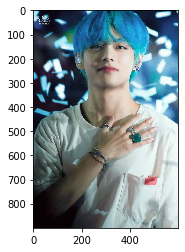

(900, 600, 3)
(1, 3, 600, 900)
(3, 596, 896)


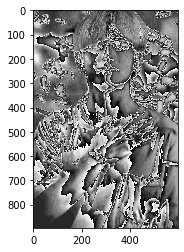

In [200]:
img = Image.open('v.jpg')
img_pi = np.array(img)
plt.imshow(img_pi, cmap='gray')
plt.show()
print(img_pi.shape)
img_pi = img_pi.transpose(2,1,0)
img_pi = np.expand_dims(img_pi,0)
print(img_pi.shape)

w = np.zeros((1,3,5,5),dtype = np.uint8)
w[0,0,1,:] =1
b = np.zeros((1,3))

Conv1 = Convolution(w,b)
imgs = Conv1.forward(img_pi)
imgs = imgs.squeeze()

img_0 = imgs[0,:,:]
img_1 = imgs[1,:,:]
img_2 = imgs[2,:,:]


# for i in range(imgs.shape[0]) : 
#   img_i = imgs[i,:,:]
#   img_i = img_i.T
#   plt.imshow(img_i, cmap='gray')
#   plt.show()

img_pooled = np.array([img_0,img_1,img_2]).astype(np.uint8)\
print(img_pooled.shape)
plt.imshow(img_pooled.transpose(2,1,0))
plt.show()